##### function to carry out histogram equalization

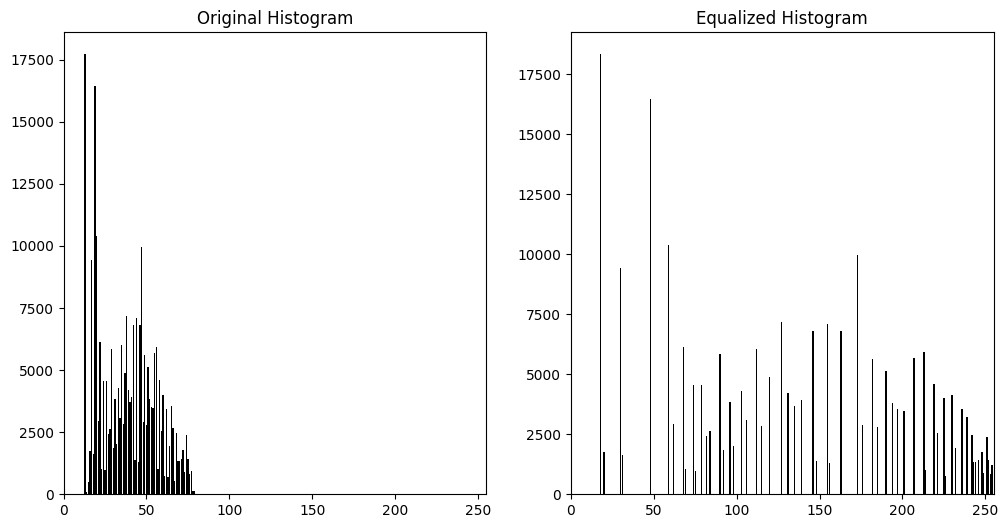

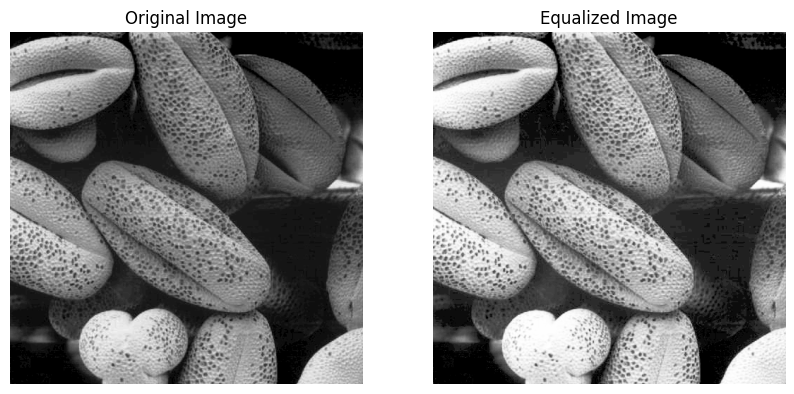

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def calculate_histogram(image):
    """ Calculate the histogram """
    histogram = np.zeros(256, dtype=int)
    for pixel in image.flatten():
        histogram[pixel] += 1
    return histogram

def equalize_histogram(image):
    """ Perform histogram equalization on an image. """
    # Calculate the histogram
    hist = calculate_histogram(image)
    
    # Calculate the cumulative distribution function (CDF)
    cdf = np.cumsum(hist)

    # Normalize the CDF
    cdf_normalized = (cdf) * 255 / cdf.max()
    cdf_normalized = cdf_normalized.astype(np.uint8)

    # Use the normalized CDF to map the original image pixels to equalized values
    equalized_image = cdf_normalized[image]
    
    return equalized_image, hist, calculate_histogram(equalized_image)

# Load the image in grayscale
image = cv2.imread(r"D:\5th sem\Image processing\Assignment 1 on Intensity Transformations and Neighborhood\Intensity-Transformations-and-Neighborhood\a1images\shells.tif", cv2.IMREAD_GRAYSCALE)
if image is None:
    raise FileNotFoundError("The specified image file was not found.")

# Perform histogram equalization
equalized_image, original_hist, equalized_hist = equalize_histogram(image)

# Visualization of the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(256), original_hist, color='black')
plt.title('Original Histogram')
plt.xlim([0, 255])

plt.subplot(1, 2, 2)
plt.bar(range(256), equalized_hist, color='black')
plt.title('Equalized Histogram')
plt.xlim([0, 255])
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')
plt.show()


##### Open the Image and Split into HSV Components

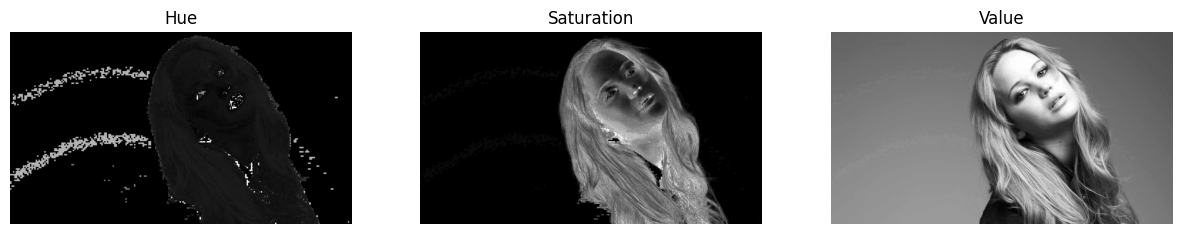

In [2]:
image_path = r"D:\5th sem\Image processing\Assignment 1 on Intensity Transformations and Neighborhood\Intensity-Transformations-and-Neighborhood\a1images\jeniffer.jpg"
image = cv2.imread(image_path)

# Convert to HSV color space
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hue, saturation, value = cv2.split(image_hsv)

# Display the hue, saturation, and value planes
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
ax[0].imshow(hue, cmap='gray')
ax[0].set_title('Hue')
ax[0].axis('off')

ax[1].imshow(saturation, cmap='gray')
ax[1].set_title('Saturation')
ax[1].axis('off')

ax[2].imshow(value, cmap='gray')
ax[2].set_title('Value')
ax[2].axis('off')

plt.show()


##### Thresholding to Extract the Foreground Mask

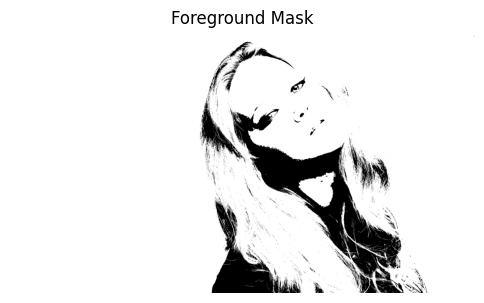

In [60]:
import numpy as np

# value component is best for extracting the foreground
_, mask = cv2.threshold(value, 75, 255, cv2.THRESH_BINARY)

# Display the mask
plt.figure(figsize=(6, 4))
plt.imshow(mask, cmap='gray')
plt.title('Foreground Mask')
plt.axis('off')
plt.show()


##### Apply Mask and Compute Histogram of the Foreground

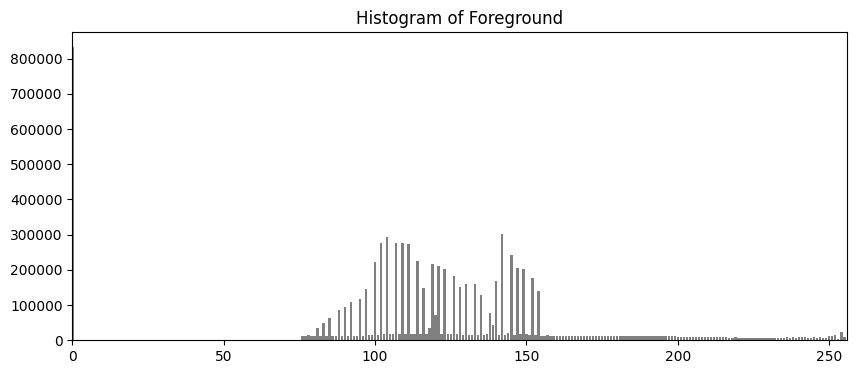

In [65]:
# Apply the mask to the value plane to get the foreground
foreground_value = cv2.bitwise_and(value, value, mask=mask)

# Calculate histogram of the foreground
histogram = calculate_histogram(foreground_value)

# Display the histogram of the foreground
plt.figure(figsize=(10, 4))
plt.bar(range(256), histogram, color='gray')
plt.title('Histogram of Foreground')
plt.xlim([0, 256])
plt.show()


##### Calculate the Cumulative Histogram

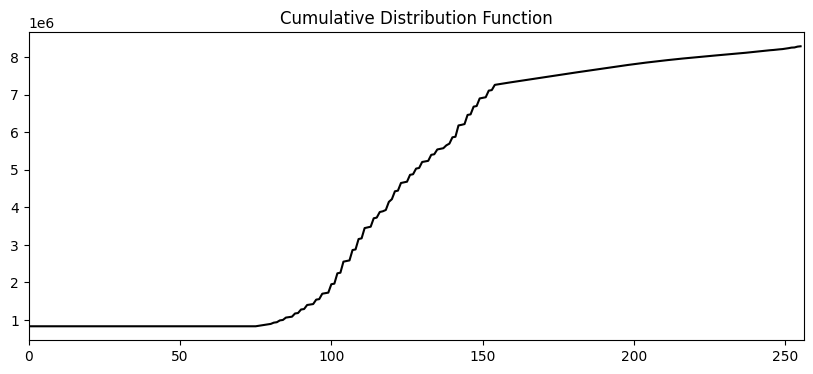

In [66]:
# Calculate the cumulative sum of the histogram
cdf = np.cumsum(histogram)

# Display the CDF
plt.figure(figsize=(10, 4))
plt.plot(cdf, color='black')
plt.title('Cumulative Distribution Function')
plt.xlim([0, 256])
plt.show()


#####  histogram-equalize the foreground

In [69]:
# Normalize the CDF
cdf_normalized = (cdf) * 255 / (cdf.max())
cdf_normalized = cdf_normalized.astype(np.uint8)

# Map the value plane
equalized_value = cdf_normalized[foreground_value]

##### Histogram Equalization of the Foreground and Combine with Background

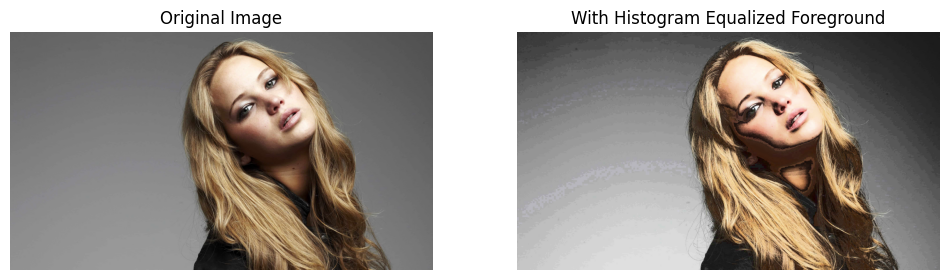

In [70]:
# Combine the equalized foreground with the original background
background_value = cv2.bitwise_and(value, value, mask=cv2.bitwise_not(mask))
combined_value = cv2.bitwise_or(equalized_value, background_value)

# Combine with original hue and saturation
final_image_hsv = cv2.merge([hue, saturation, combined_value])
final_image = cv2.cvtColor(final_image_hsv, cv2.COLOR_HSV2BGR)

# Display the original and final images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
plt.title('With Histogram Equalized Foreground')
plt.axis('off')
plt.show()
